Problem statement:
-To predict the price of the flight ticket. 

In [1]:
#loading the dataset

import pandas as pd
import numpy as np

df=pd.read_excel(r"C:\Users\Yash Bhardwaj\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.sample(8)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
5342,IndiGo,27/04/2019,Banglore,Delhi,BLR → DEL,13:00,15:50,2h 50m,non-stop,No info,4423
10421,Jet Airways,12/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,In-flight meal not included,10844
2456,Jet Airways,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:25,10:55 07 Jun,14h 30m,1 stop,In-flight meal not included,10539
1312,Jet Airways,9/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,12:35 10 Jun,29h 50m,2 stops,No info,13376
8993,Multiple carriers,12/06/2019,Delhi,Cochin,DEL → BOM → COK,06:00,21:00,15h,1 stop,No info,7005
3245,Jet Airways,24/06/2019,Delhi,Cochin,DEL → BOM → COK,19:15,04:25 25 Jun,9h 10m,1 stop,In-flight meal not included,10262
4556,Multiple carriers,6/03/2019,Delhi,Cochin,DEL → HYD → COK,14:35,22:20,7h 45m,1 stop,In-flight meal not included,7563
10280,Air Asia,24/03/2019,Kolkata,Banglore,CCU → DEL → BLR,07:35,22:55,15h 20m,1 stop,No info,6785


In [5]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
#checking for null values

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

- as there are only two missing values present, we will drop them

In [10]:
df=df.dropna()

In [11]:
#now checking for null values

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA and PREPROCESSING

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


- so as we can see that the columns has categorical datatype
- the dataset has Date_of_Journey,Dep_Time,Arrival_Time,Duration as object datatype, so we can use pandas datetime function to get required results 

-lets first deal with 'Duration' as it has value in both hours and minutes, we will convert it in minutes only for a better understanding

In [25]:
df['Duration'][67]

'1h 30m'

In [2]:
df['Duration_New']=df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [28]:
df['Duration_New'][67]

90

- so the 'Duration' feature has been transformed

In [3]:
#now lets deal with 'Date_of_Journey' as  the data is in object datatype we will change it to datetime an then extract day of journey and month of journey

import datetime

df['Day_of_Journey']=pd.to_datetime(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=pd.to_datetime(df['Date_of_Journey']).dt.month

In [42]:
df['Day_of_Journey']

0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: Day_of_Journey, Length: 10683, dtype: int64

In [4]:
#now lets, deal with arrival and departure time

df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [44]:
df['Dep_hour']

0        22
1         5
2         9
3        18
4        16
         ..
10678    19
10679    20
10680     8
10681    11
10682    10
Name: Dep_hour, Length: 10683, dtype: int64

In [5]:
#same goes for arrival time

df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

In [46]:
df['Arrival_hour']

0         1
1        13
2         4
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_hour, Length: 10683, dtype: int64

In [47]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_New,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,5,1,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140,6,9,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325,5,12,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285,3,1,16,50,21,35


In [48]:
#now lets go for 'Total_Stops'

df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

- as this variable has 4 unique class which are may be correlated with our target variable, as flight price are correlated with stops we will encode it later

In [50]:
#now lets deal with 'Additional_Info'

df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

- it is also a crucial variable but it has a typo so we will replace it

In [6]:
df['Additional_Info'].replace('No Info','No info',inplace=True)
df['Additional_Info'].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [52]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_New,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,5,1,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140,6,9,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325,5,12,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285,3,1,16,50,21,35


In [7]:
#now lets deal with categorical type data

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Airline_New']=le.fit_transform(df['Airline'])
df['Source_New']=le.fit_transform(df['Source'])
df['Destination_New']=le.fit_transform(df['Destination'])
df['Route_New']=le.fit_transform(df['Route'])
df['Total_Stops_New']=le.fit_transform(df['Total_Stops'])
df['Additional_Info_New']=le.fit_transform(df['Additional_Info'])

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

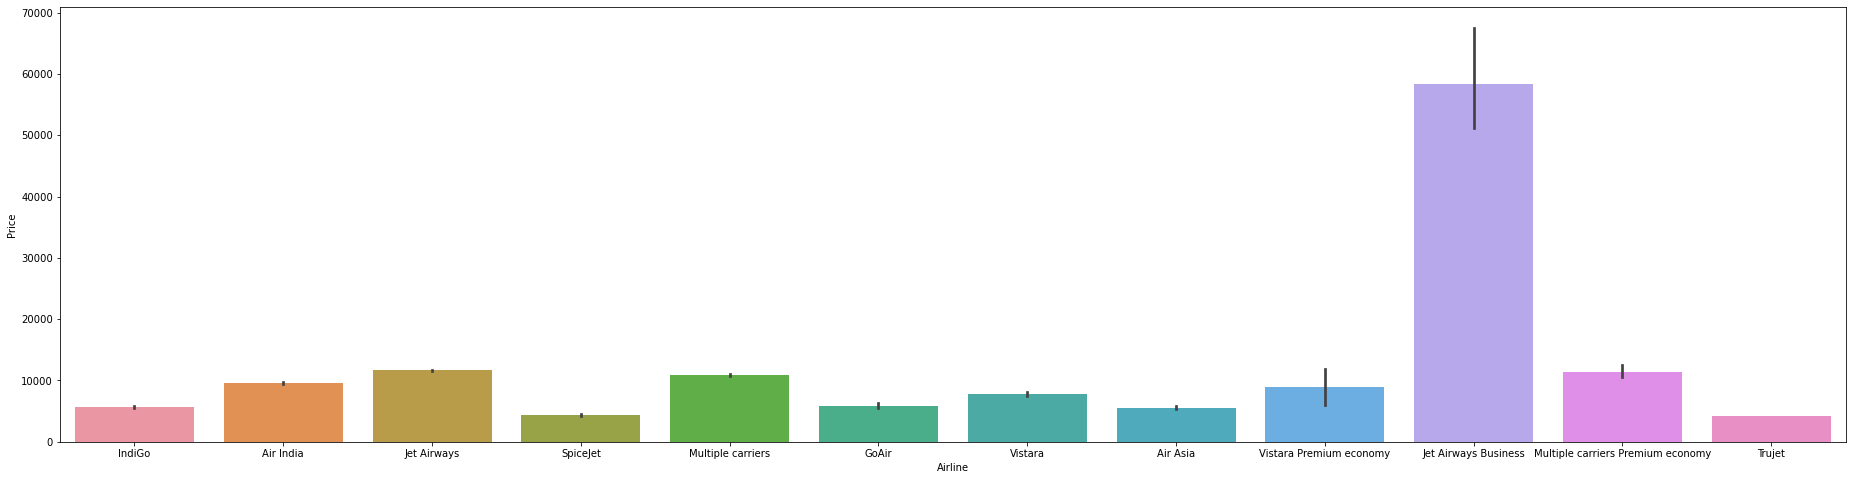

In [59]:
plt.figure(figsize=(32,8))
sns.barplot('Airline','Price',data=df)
plt.show()

- it can be seen that 'Jet Airways Business' has the highest price following by 'Jet Airways' and 'Multiple carriers' while 'Spicejet' has the cheapest price

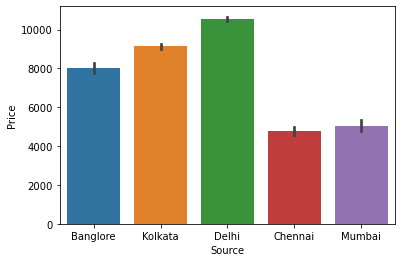

In [60]:
sns.barplot('Source','Price',data=df)
plt.show()

- Source as 'Delhi' has the highest prices following by 'Kolkata' 'Banglore', with 'Chennai' as the cheapest prices source city

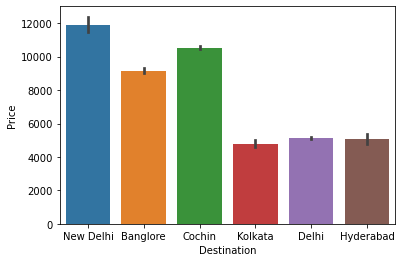

In [61]:
sns.barplot('Destination','Price',data=df)
plt.show()

- while 'New Delhi' has the highest prices 'Kolkata' has cheapest

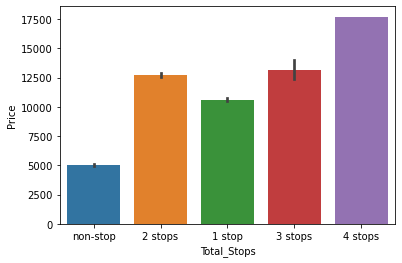

In [62]:
sns.barplot('Total_Stops','Price',data=df)
plt.show()

- 4 stops flight has the highest prices following by 3 stops, 2 stops and 1 stop, Non-stop flights are cheaper

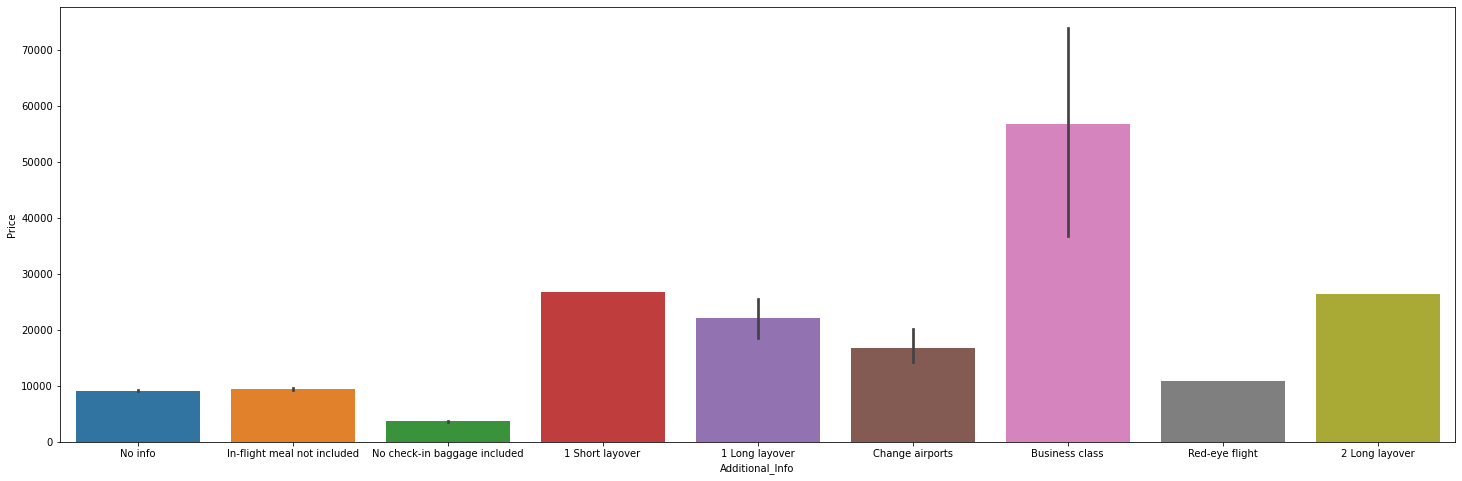

In [67]:
plt.figure(figsize=(25,8))
sns.barplot('Additional_Info','Price',data=df)
plt.show()

- Business class has the highest prices following by layovers, No check-in baggage included are cheaper

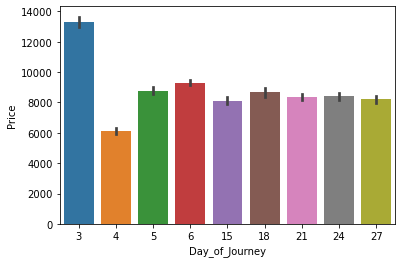

In [68]:
sns.barplot('Day_of_Journey','Price',data=df)
plt.show()

- Day 3 of the months has the highest price, while 18-21 have similar kind of prices Day 15 has the lowest

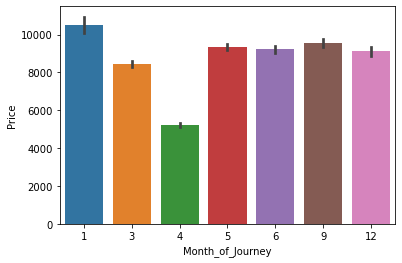

In [69]:
sns.barplot('Month_of_Journey','Price',data=df)
plt.show()

- first month of the year has the highest prices with 4 month as cheapest prices,from month 5 to 12 prices are reasonably great

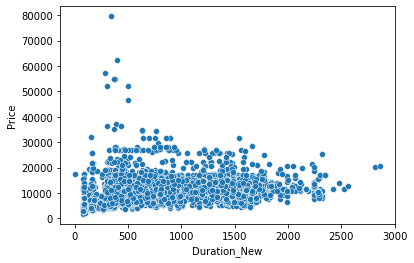

In [73]:
sns.scatterplot('Duration_New','Price',data=df)
plt.show()

- it can be seen that price is higher for less duration hours only

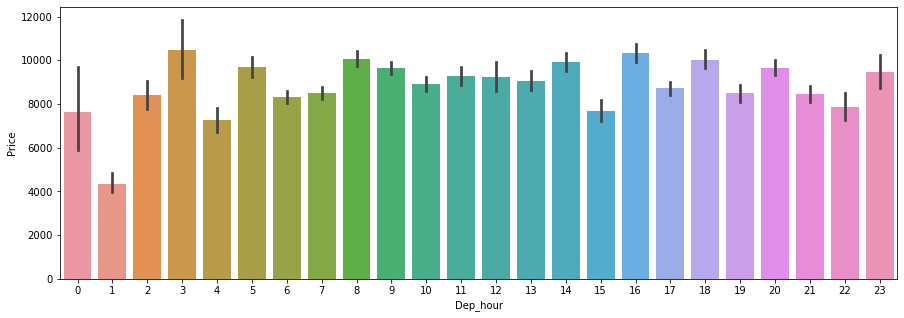

In [79]:
plt.figure(figsize=(15,5))
sns.barplot('Dep_hour','Price',data=df)
plt.show()

- 1 am has the cheapest fligt prices, 3 am has the highest prices, but throught a day prices are almost aorund one another

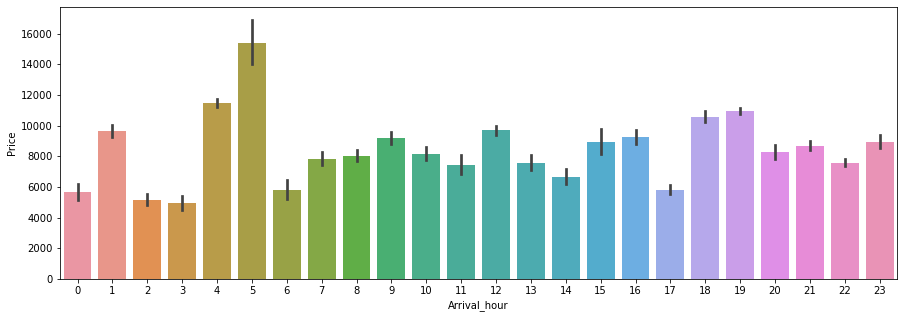

In [81]:
plt.figure(figsize=(15,5))
sns.barplot('Arrival_hour','Price',data=df)
plt.show()

- early morning arrival has the highest prices 

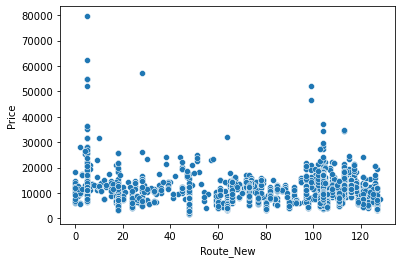

In [85]:
sns.scatterplot('Route_New','Price',data=df)
plt.show()

- the data isn't uniform, Route label 5 has the highest prices while other Routes has almost same prices in most cases

In [8]:
#checking for correlation

df.corr()

,Price,Duration_New,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_New,Source_New,Destination_New,Route_New,Total_Stops_New,Additional_Info_New
Price,1.000000,0.506371,-0.165412,0.010700,0.006819,-0.024492,0.024264,-0.086155,-0.039520,0.015998,-0.071112,0.164085,-0.571179,-0.063769
Duration_New,0.506371,1.000000,-0.038480,0.055152,0.002001,-0.018938,0.051434,-0.069653,-0.159803,0.161874,-0.257365,0.288920,-0.601827,-0.152976
Day_of_Journey,-0.165412,-0.038480,1.000000,-0.264899,-0.002251,-0.016521,-0.002124,-0.021424,0.031218,0.007560,-0.052076,0.096470,0.043674,-0.017937
Month_of_Journey,0.010700,0.055152,-0.264899,1.000000,0.028180,0.002152,-0.004338,-0.025786,-0.007918,0.063052,-0.105039,0.042211,-0.056475,-0.001300
Dep_hour,0.006819,0.002001,-0.002251,0.028180,1.000000,-0.024806,0.005215,0.067909,-0.035194,0.059044,-0.072979,-0.075076,0.039105,-0.048103
Dep_min,-0.024492,-0.018938,-0.016521,0.002152,-0.024806,1.000000,0.043054,-0.017594,-0.060044,-0.056991,0.127892,-0.067912,0.049090,-0.026029
Arrival_hour,0.024264,0.051434,-0.002124,-0.004338,0.005215,0.043054,1.000000,-0.154362,-0.007491,0.025632,-0.039710,0.013811,-0.095748,0.031137
Arrival_min,-0.086155,-0.069653,-0.021424,-0.025786,0.067909,-0.017594,-0.154362,1.000000,-0.071089,0.021040,0.017196,-0.173332,0.175952,0.039346
Airline_New,-0.039520,-0.159803,0.031218,-0.007918,-0.035194,-0.060044,-0.007491,-0.071089,1.000000,-0.013401,0.018479,0.025039,0.035732,-0.077793
Source_New,0.015998,0.161874,0.007560,0.063052,0.059044,-0.056991,0.025632,0.021040,-0.013401,1.000000,-0.592574,0.403378,-0.225557,-0.015856


In [9]:
df.corr()['Price'].sort_values(ascending=False)

Price                  1.000000
Duration_New           0.506371
Route_New              0.164085
Arrival_hour           0.024264
Source_New             0.015998
Month_of_Journey       0.010700
Dep_hour               0.006819
Dep_min               -0.024492
Airline_New           -0.039520
Additional_Info_New   -0.063769
Destination_New       -0.071112
Arrival_min           -0.086155
Day_of_Journey        -0.165412
Total_Stops_New       -0.571179
Name: Price, dtype: float64

conclusion:
    
- Duration has a strong correlation bond with the target variable
- Route has good correlation bond with the target variable
- Arrival_hour,Source,Month_of_Journey,Dep_Hour have weak correlation bond with the target variable
- Dep_Min,Airline,Additional_Info,Destination,Arrival-Min have very weak negative correlation with the target variable
- Day_of_Journey has a good negative correlation bond with the target variable, but Total_Stops has a strong negative correlation bond with target variable

<Figure size 432x288 with 0 Axes>

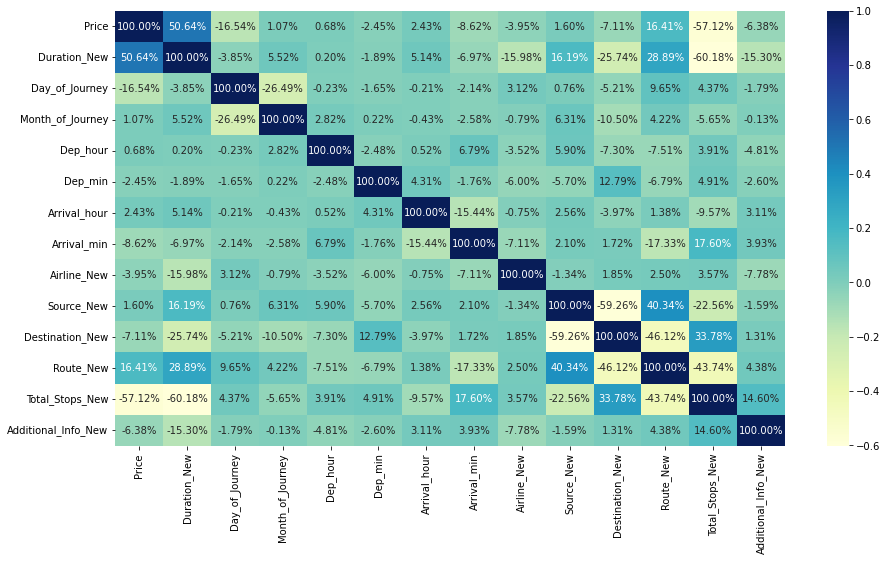

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2%')
plt.figure()

In [14]:
# now let's, describe our dataset:

df.describe()

,Price,Duration_New,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_New,Source_New,Destination_New,Route_New,Total_Stops_New,Additional_Info_New
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,643.093232,12.682205,5.534775,12.490686,24.411214,13.348778,24.690630,3.965927,1.952261,1.436113,74.825143,1.458579,6.582140
std,4611.359167,507.862001,8.803701,2.987489,5.748650,18.767980,6.859125,16.506036,2.352155,1.177221,1.474782,36.730924,1.806560,0.838073
min,1759.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,170.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,3.000000,2.000000,0.000000,48.000000,0.000000,7.000000
50%,8372.000000,520.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,4.000000,2.000000,1.000000,73.000000,0.000000,7.000000
75%,12373.000000,930.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,4.000000,3.000000,2.000000,104.000000,4.000000,7.000000
max,79512.000000,2860.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,11.000000,4.000000,5.000000,128.000000,5.000000,8.000000


observations:
- std is high for Price and Duration which means these two features have long range of data
- features like Duration,Day_of_Journey etc have mean value as greater than their median, so kewness might be present
- outliers might be also present as huge difference is present between 75th percentile and maximum value for almost all feature variables

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10683 non-null  object
 1   Date_of_Journey      10683 non-null  object
 2   Source               10683 non-null  object
 3   Destination          10683 non-null  object
 4   Route                10682 non-null  object
 5   Dep_Time             10683 non-null  object
 6   Arrival_Time         10683 non-null  object
 7   Duration             10683 non-null  object
 8   Total_Stops          10682 non-null  object
 9   Additional_Info      10683 non-null  object
 10  Price                10683 non-null  int64 
 11  Duration_New         10683 non-null  int64 
 12  Day_of_Journey       10683 non-null  int64 
 13  Month_of_Journey     10683 non-null  int64 
 14  Dep_hour             10683 non-null  int64 
 15  Dep_min              10683 non-null  int64 
 16  Arri

<AxesSubplot:xlabel='Price'>

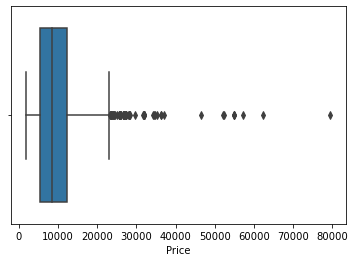

In [26]:
#let's check for outliers

sns.boxplot(df['Price'])

- outliers are present

<AxesSubplot:xlabel='Duration_New'>

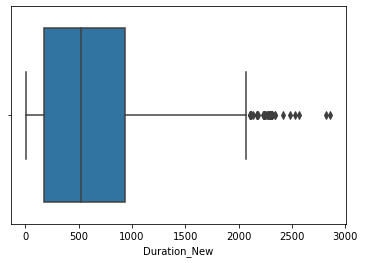

In [27]:
sns.boxplot(df['Duration_New'])

<AxesSubplot:xlabel='Day_of_Journey'>

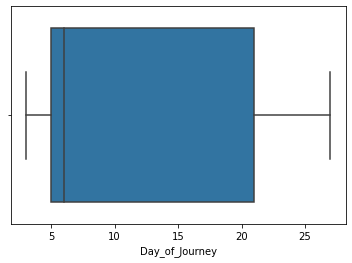

In [28]:
sns.boxplot(df['Day_of_Journey'])

<AxesSubplot:xlabel='Dep_min'>

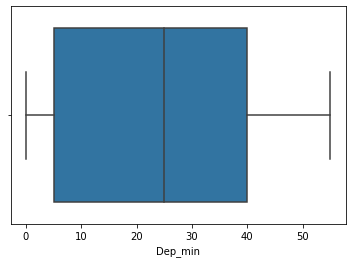

In [29]:
sns.boxplot(df['Dep_min'])

<AxesSubplot:xlabel='Route_New'>

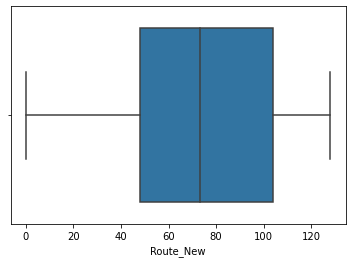

In [30]:
sns.boxplot(df['Route_New'])

- okay so the data has outliers 

Data Cleaning:
- here we will deal with outliers,skewness and feature selection

In [32]:
#removing categorical columns

for i in df.columns:
    if df[i].dtypes=='object':
        df.drop(i,axis=1,inplace=True)
    else:
        pass

In [33]:
df

,Price,Duration_New,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_New,Source_New,Destination_New,Route_New,Total_Stops_New,Additional_Info_New
0,3897,170,24,3,22,20,1,10,3,0,5,18,4,7
1,7662,445,5,1,5,50,13,15,1,3,0,84,1,7
2,13882,1140,6,9,9,25,4,25,4,2,1,118,1,7
3,6218,325,5,12,18,5,23,30,3,3,0,91,0,7
4,13302,285,3,1,16,50,21,35,3,0,5,29,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,150,4,9,19,55,22,25,0,3,0,64,4,7
10679,4145,155,27,4,20,45,23,20,1,3,0,64,4,7
10680,7229,180,27,4,8,20,11,20,4,0,2,18,4,7
10681,12648,160,3,1,11,30,14,10,10,0,5,18,4,7


In [34]:
#lets check out for outliers using zscore

from scipy.stats import zscore

z=np.abs(zscore(df))

In [35]:
np.where(z>3)

(array([  123,   226,   396,   486,   510,   553,   597,   628,   657,
          785,   785,   826,   936,   946,   959,   966,   969,   975,
         1043,  1067,  1113,  1196,  1246,  1341,  1346,  1424,  1442,
         1466,  1478,  1496,  1551,  1629,  1654,  1657,  1712,  1785,
         1791,  1804,  1918,  2055,  2079,  2099,  2108,  2172,  2405,
         2481,  2495,  2495,  2553,  2556,  2556,  2618,  2635,  2641,
         2654,  2693,  2718,  2883,  2924,  2924,  3032,  3032,  3111,
         3111,  3257,  3400,  3457,  3535,  3535,  3700,  3700,  3788,
         3790,  3815,  3966,  4012,  4047,  4118,  4463,  4521,  4521,
         4655,  4676,  4829,  5013,  5013,  5136,  5372,  5372,  5439,
         5516,  5628,  5662,  5701,  5701,  5710,  5711,  5719,  5738,
         5745,  5782,  5856,  5933,  5953,  5986,  6024,  6059,  6085,
         6314,  6321,  6336,  6407,  6476,  6576,  6576,  6588,  6605,
         6884,  6991,  7189,  7232,  7306,  7329,  7351,  7356,  7377,
      

In [36]:
z.iloc[123][0]

3.9779582952974644

In [37]:
#so outliers are present, so we will remove them or keep them, it won't affect our model majorily

df_new=df[(z<3).all(axis=1)]

In [38]:
df.shape

(10683, 14)

In [39]:
df_new.shape

(10507, 14)

In [41]:
print('Data loss is:',(10683-10507)/10683,'%')

Data loss is: 0.016474773003837873 %


- as the data loss is below even 1 percent, we will remove these outliers

In [68]:
# now selecting our feature and target variable for further process

x=df_new.drop('Price',axis=1)
y=df_new['Price']

In [43]:
x.shape

(10507, 13)

In [44]:
y.shape

(10507,)

In [45]:
#checking for skewness

x.skew()

Duration_New           0.778793
Day_of_Journey         0.353289
Month_of_Journey       0.635315
Dep_hour               0.103500
Dep_min                0.171520
Arrival_hour          -0.361699
Arrival_min            0.107406
Airline_New            0.729157
Source_New            -0.439419
Destination_New        1.266002
Route_New             -0.506962
Total_Stops_New        0.613380
Additional_Info_New   -1.473336
dtype: float64

threshold= +/- 0.50 , so almost every feature variable skewness is falling inside this range only, but we will apply skewness removal method for the rest one

<AxesSubplot:xlabel='Duration_New', ylabel='Density'>

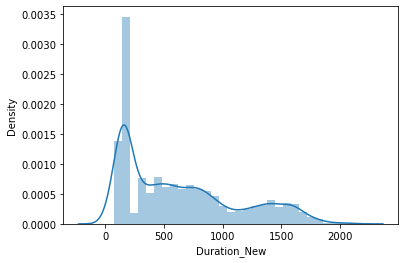

In [63]:
sns.distplot(x['Duration_New'])

<AxesSubplot:xlabel='Additional_Info_New', ylabel='Density'>

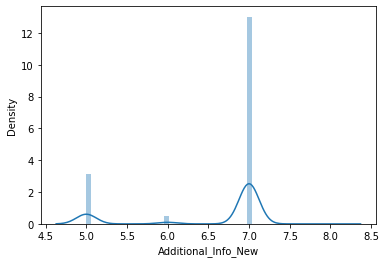

In [64]:
sns.distplot(x['Additional_Info_New'])

- it can be seen that the values are far away from normal distribution curve

In [70]:
#using power_transform method

from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')
x=pd.DataFrame(x,columns=['Duration_New', 'Day_of_Journey', 'Month_of_Journey', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Airline_New', 'Source_New',
       'Destination_New', 'Route_New', 'Total_Stops_New',
       'Additional_Info_New'])
x.skew()

Duration_New          -0.047367
Day_of_Journey         0.010563
Month_of_Journey      -0.023285
Dep_hour              -0.106158
Dep_min               -0.358572
Arrival_hour          -0.353140
Arrival_min           -0.350949
Airline_New           -0.014316
Source_New            -0.236065
Destination_New        0.041290
Route_New             -0.434849
Total_Stops_New        0.322720
Additional_Info_New   -1.136429
dtype: float64

<AxesSubplot:xlabel='Duration_New', ylabel='Density'>

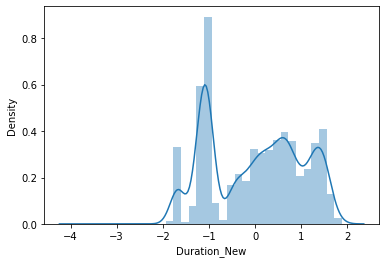

In [71]:
sns.distplot(x['Duration_New'])

- skewness has been reduced

<AxesSubplot:xlabel='Additional_Info_New', ylabel='Density'>

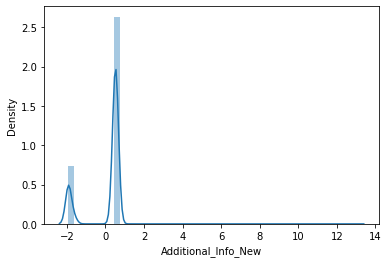

In [72]:
sns.distplot(x['Additional_Info_New'])

In [73]:
#checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [74]:
vif_calc()

    VIF Factor             features
0     2.191586         Duration_New
1     1.063414       Day_of_Journey
2     1.047380     Month_of_Journey
3     1.035419             Dep_hour
4     1.022757              Dep_min
5     1.064383         Arrival_hour
6     1.120400          Arrival_min
7     1.112456          Airline_New
8     1.742938           Source_New
9     1.863223      Destination_New
10    1.400240            Route_New
11    2.116686      Total_Stops_New
12    1.090761  Additional_Info_New


- okay so VIF for all feature variables is low

In [75]:
#scaling the input data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [78]:
#importing the required library

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [79]:
lr=LinearRegression()

In [80]:
#checking best random state

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.33)
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predlr=lr.predict(x_test)
    if round(r2_score(y_test,predlr)*100)==round(r2_score(y_train,predtrain)*100):
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',r2_score(y_train,predtrain)*100)
        print('Testing accuracy score is',r2_score(y_test,predlr)*100,'\n')

At random state 4 the model performs very well
At random state 4 :
Training accuracy score is 49.6600703929692
Testing accuracy score is 49.88289089229983 

At random state 8 the model performs very well
At random state 8 :
Training accuracy score is 49.69890797380939
Testing accuracy score is 49.85257289458881 

At random state 21 the model performs very well
At random state 21 :
Training accuracy score is 49.587943347306094
Testing accuracy score is 50.15418212623853 

At random state 23 the model performs very well
At random state 23 :
Training accuracy score is 49.80413023556074
Testing accuracy score is 49.55437614683188 

At random state 28 the model performs very well
At random state 28 :
Training accuracy score is 49.57755566454982
Testing accuracy score is 50.08059597054142 

At random state 31 the model performs very well
At random state 31 :
Training accuracy score is 49.603041019163854
Testing accuracy score is 50.01321046734726 

At random state 32 the model performs very 

In [81]:
#let's take 89 as the random state

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=.33)
lr.fit(x_train,y_train)
predtrain=lr.predict(x_train)
predlr=lr.predict(x_test)

In [82]:
#checking cross validation score for LinearRegression

for j in range(2,10):
    lrs=cross_val_score(lr,x,y,cv=j)
    lrc=lrs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lrc*100)
    print('Accuracy score is:',r2_score(y_test,predlr)*100,'\n')

At cv= 2
Cross Validation Score is: 49.47235704400422
Accuracy score is: -50.18664124376902 

At cv= 3
Cross Validation Score is: 49.55451226049636
Accuracy score is: -50.18664124376902 

At cv= 4
Cross Validation Score is: 49.607257755381106
Accuracy score is: -50.18664124376902 

At cv= 5
Cross Validation Score is: 49.556077337792416
Accuracy score is: -50.18664124376902 

At cv= 6
Cross Validation Score is: 49.54321555246457
Accuracy score is: -50.18664124376902 

At cv= 7
Cross Validation Score is: 49.564663995454836
Accuracy score is: -50.18664124376902 

At cv= 8
Cross Validation Score is: 49.59662744645576
Accuracy score is: -50.18664124376902 

At cv= 9
Cross Validation Score is: 49.588113748154974
Accuracy score is: -50.18664124376902 



- our model is performing very poor with LinearRegression, so let's first try regularization and then ensemble and other regression algorithms

In [87]:
#checking error for LinearRegression

mselr=mean_squared_error(y_test,predlr)
maelr=mean_absolute_error(y_test,predlr)
print(mselr)
print(maelr)

24993041.98430163
4103.900547235836


In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

# Regularization:

In [119]:
from sklearn.linear_model import Lasso,Ridge

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=.33)
ls=Lasso()
ls.fit(x_train,y_train)
predtrain=ls.predict(x_train)
predls=ls.predict(x_test)

In [121]:
#checking for cross validation score

for j in range(2,10):
    lss=cross_val_score(ls,x,y,cv=j)
    lsc=lss.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lsc*100)
    print('Accuracy score is:',r2_score(y_test,predls)*100,'\n')

At cv= 2
Cross Validation Score is: 49.473252888119426
Accuracy score is: 49.74749320839561 

At cv= 3
Cross Validation Score is: 49.555368441655574
Accuracy score is: 49.74749320839561 

At cv= 4
Cross Validation Score is: 49.60792091309482
Accuracy score is: 49.74749320839561 

At cv= 5
Cross Validation Score is: 49.556729781545826
Accuracy score is: 49.74749320839561 

At cv= 6
Cross Validation Score is: 49.54398843253509
Accuracy score is: 49.74749320839561 

At cv= 7
Cross Validation Score is: 49.56530310360613
Accuracy score is: 49.74749320839561 

At cv= 8
Cross Validation Score is: 49.5973423732305
Accuracy score is: 49.74749320839561 

At cv= 9
Cross Validation Score is: 49.58916451168813
Accuracy score is: 49.74749320839561 



- Cross validation score has been improved comparing LinearRegression

In [88]:
#checking error for Lasso 

msels=mean_squared_error(y_test,predls)
maels=mean_absolute_error(y_test,predls)
print(msels)
print(maels)

8362681.27216727
2247.6463081689476


In [122]:
lrr=Ridge()
lrr.fit(x_train,y_train)
predlrr=lrr.predict(x_test)
print(r2_score(y_test,predlrr)*100)

49.74765907113755


In [123]:
#checking for cross validation score

for j in range(2,10):
    lrrs=cross_val_score(lrr,x,y,cv=j)
    lrrc=lrrs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lrrc*100)
    print('Accuracy score is:',r2_score(y_test,predlrr)*100,'\n')

At cv= 2
Cross Validation Score is: 49.472409067765334
Accuracy score is: 49.74765907113755 

At cv= 3
Cross Validation Score is: 49.554569181453395
Accuracy score is: 49.74765907113755 

At cv= 4
Cross Validation Score is: 49.6072943294301
Accuracy score is: 49.74765907113755 

At cv= 5
Cross Validation Score is: 49.55610867803967
Accuracy score is: 49.74765907113755 

At cv= 6
Cross Validation Score is: 49.54325435754737
Accuracy score is: 49.74765907113755 

At cv= 7
Cross Validation Score is: 49.56469673871838
Accuracy score is: 49.74765907113755 

At cv= 8
Cross Validation Score is: 49.59666330138623
Accuracy score is: 49.74765907113755 

At cv= 9
Cross Validation Score is: 49.588146514431116
Accuracy score is: 49.74765907113755 



In [124]:
#checking error for Ridge

mselrr=mean_squared_error(y_test,predlrr)
maelrr=mean_absolute_error(y_test,predlrr)
print(mselrr)
print(maelrr)

8362653.670414953
2247.623098377068


# Ensemble:

- In this section we will try some ensemble technique to find the best model and we will also try out some other regressors

In [125]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [100]:
ada=AdaBoostRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=.33)
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print(r2_score(y_test,predada)*100)

62.127228970996626


In [102]:
#checking for cross validation score

for j in range(2,6):
    adas=cross_val_score(ada,x,y,cv=j)
    adac=adas.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',adac*100)
    print('Accuracy score is:',r2_score(y_test,predada)*100,'\n')

At cv= 2
Cross Validation Score is: 60.55944245512326
Accuracy score is: 62.127228970996626 

At cv= 3
Cross Validation Score is: 60.90047974330899
Accuracy score is: 62.127228970996626 

At cv= 4
Cross Validation Score is: 61.83666315635492
Accuracy score is: 62.127228970996626 

At cv= 5
Cross Validation Score is: 61.862757668587
Accuracy score is: 62.127228970996626 



- Both accuracy score and cross validation score have been improved as comapred to LinearRegressiona and regularization

In [103]:
#checking error for AdaBoost

mseada=mean_squared_error(y_test,predada)
maeada=mean_absolute_error(y_test,predada)
print(mseada)
print(maeada)

6302529.629471922
2108.865855256317


In [104]:
gb=GradientBoostingRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=.33)
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(r2_score(y_test,predgb)*100)

84.04583062666711


In [105]:
#checking for cross validation score

for j in range(2,6):
    gbs=cross_val_score(gb,x,y,cv=j)
    gbc=gbs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',gbc*100)
    print('Accuracy score is:',r2_score(y_test,predgb)*100,'\n')

At cv= 2
Cross Validation Score is: 83.75888442599427
Accuracy score is: 84.04583062666711 

At cv= 3
Cross Validation Score is: 84.12280091644423
Accuracy score is: 84.04583062666711 

At cv= 4
Cross Validation Score is: 84.26142014647611
Accuracy score is: 84.04583062666711 

At cv= 5
Cross Validation Score is: 84.3327108488649
Accuracy score is: 84.04583062666711 



- Model is performing very well with GradientBoostingRegressor, both accuracy score and cross validation score have improved

In [106]:
#checking error for GradientBoosting

msegb=mean_squared_error(y_test,predgb)
maegb=mean_absolute_error(y_test,predgb)
print(msegb)
print(maegb)

2654984.6355852988
1154.8818723303004


In [109]:
knn=KNeighborsRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=.33)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(r2_score(y_test,predknn)*100)

77.80278521292735


In [110]:
#checking for cross validation score

for j in range(2,6):
    knns=cross_val_score(knn,x,y,cv=j)
    knnc=knns.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',knnc*100)
    print('Accuracy score is:',r2_score(y_test,predknn)*100,'\n')

At cv= 2
Cross Validation Score is: 75.68175352751965
Accuracy score is: 77.80278521292735 

At cv= 3
Cross Validation Score is: 77.90121838797197
Accuracy score is: 77.80278521292735 

At cv= 4
Cross Validation Score is: 78.72414705743273
Accuracy score is: 77.80278521292735 

At cv= 5
Cross Validation Score is: 79.28215562730921
Accuracy score is: 77.80278521292735 



- The model with Kneighbors algorithm is performing better than LinearRegression, AdaBoost and regularization

In [111]:
#checking error for KNeighbors

mseknn=mean_squared_error(y_test,predknn)
maeknn=mean_absolute_error(y_test,predknn)
print(mseknn)
print(maeknn)

3693909.901130334
1226.5185697808536


In [112]:
dtc=DecisionTreeRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=.33)
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(r2_score(y_test,preddtc)*100)

88.11242057014226


In [115]:
#checking for cross validation score

for j in range(2,6):
    dtcs=cross_val_score(dtc,x,y,cv=j)
    dtcc=dtcs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',dtcc*100)
    print('Accuracy score is:',r2_score(y_test,preddtc)*100,'\n')

At cv= 2
Cross Validation Score is: 85.15854820748604
Accuracy score is: 88.11242057014226 

At cv= 3
Cross Validation Score is: 87.43407384704578
Accuracy score is: 88.11242057014226 

At cv= 4
Cross Validation Score is: 87.48392874990209
Accuracy score is: 88.11242057014226 

At cv= 5
Cross Validation Score is: 87.84483981328357
Accuracy score is: 88.11242057014226 



- The accuracy score is very high with DecisionTreeRegressor but cross validation score is only a little less at purely random states, so very little overfitting might be there

In [116]:
#checking error for DecisionTree

msedtc=mean_squared_error(y_test,preddtc)
maedtc=mean_absolute_error(y_test,preddtc)
print(msedtc)
print(maedtc)

1978250.3245406414
663.0318867743176


In [114]:
rf=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=.33)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf)*100)

92.3493081080961


In [117]:
#checking for cross validation score

for j in range(2,6):
    rfs=cross_val_score(rf,x,y,cv=j)
    rfc=rfs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',rfc*100)
    print('Accuracy score is:',r2_score(y_test,predrf)*100,'\n')

At cv= 2
Cross Validation Score is: 91.31421392639109
Accuracy score is: 92.3493081080961 

At cv= 3
Cross Validation Score is: 92.16965607496209
Accuracy score is: 92.3493081080961 

At cv= 4
Cross Validation Score is: 92.28635638665651
Accuracy score is: 92.3493081080961 

At cv= 5
Cross Validation Score is: 92.4111079424157
Accuracy score is: 92.3493081080961 



- So, by far RandomForestRegressor is giving us exceptional results

In [118]:
#checking error for RandomForest

mserf=mean_squared_error(y_test,predrf)
maerf=mean_absolute_error(y_test,predrf)
print(mserf)
print(maerf)

1273176.2431050667
593.6805052646876


In [127]:
algodf=pd.DataFrame({'Mean Squared Error':[mselr,msels,mselrr,mseknn,msedtc,mseada,msegb,mserf],'Mean Absolute Error':[maelr,maels,maelrr,maeknn,maedtc,maeada,maegb,maerf],'Accuracy Score':[r2_score(y_test,predlr),r2_score(y_test,predls),r2_score(y_test,predlrr),r2_score(y_test,predknn),r2_score(y_test,preddtc),r2_score(y_test,predada),r2_score(y_test,predgb),r2_score(y_test,predrf)]},index=['LinearRegression','Lasso','Ridge','KNeighborsRegressor','DecisionTreeClassifier','AdaBoostRegressor','GradientBoostingRegressor','RandomForestRegressor'])
algodf

,Mean Squared Error,Mean Absolute Error,Accuracy Score
LinearRegression,2.499304e+07,4103.900547,-0.501866
Lasso,8.362681e+06,2247.646308,0.497475
Ridge,8.362654e+06,2247.623098,0.497477
KNeighborsRegressor,3.693910e+06,1226.518570,0.778028
DecisionTreeClassifier,1.978250e+06,663.031887,0.881124
AdaBoostRegressor,6.302530e+06,2108.865855,0.621272
GradientBoostingRegressor,2.654985e+06,1154.881872,0.840458
RandomForestRegressor,1.273176e+06,593.680505,0.923493


- so, as RandomForest is giving best results, hyperparameter tuning will be done using GridSearchCV

# Hyperparameter Tuning:

In [128]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters={'criterion':["squared_error", "absolute_error", "poisson"],'max_features':['sqrt','log2','auto']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=.33)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [136]:
for i in range(10):
    rf=RandomForestRegressor(criterion='squared_error',max_features='auto')
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.33)
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    
    print('At random state:',i)
    print(r2_score(y_test,predrf)*100,'\n')

At random state: 0
91.56956828936967 

At random state: 1
92.56458312545819 

At random state: 2
91.82151865240482 

At random state: 3
91.31391028026061 

At random state: 4
91.745699567049 

At random state: 5
92.5564711596487 

At random state: 6
92.74459343149667 

At random state: 7
91.45756472324716 

At random state: 8
92.47056812972251 

At random state: 9
91.75110016576518 



In [137]:
rf=RandomForestRegressor(criterion='squared_error',max_features='auto')
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6,test_size=.33)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2_score(y_test,predrf)

0.9288921628686461

In [133]:
#checking for cross validation score

rf=RandomForestRegressor(criterion='squared_error',max_features='auto')
for j in range(2,11):
    rfs=cross_val_score(rf,x,y,cv=j)
    rfc=rfs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',rfc*100,'\n')

At cv= 2
Cross Validation Score is: 91.23903779542462 

At cv= 3
Cross Validation Score is: 92.23698957297252 

At cv= 4
Cross Validation Score is: 92.33838826114571 

At cv= 5
Cross Validation Score is: 92.38111603235077 

At cv= 6
Cross Validation Score is: 92.6290557204832 

At cv= 7
Cross Validation Score is: 92.74974454286982 

At cv= 8
Cross Validation Score is: 92.6965150493112 

At cv= 9
Cross Validation Score is: 92.72862783193209 

At cv= 10
Cross Validation Score is: 92.86649350750581 



In [138]:
rfs=cross_val_score(rf,x,y,cv=10)
rfc=rfs.mean()

In [141]:
print('The model is performing extremely well with RandomForestRegressor')
print('Accuracy Score:', round(r2_score(y_test,predrf)*100))
print('Cross Validation Score:', round(rfc*100))

The model is performing extremely well with RandomForestRegressor
Accuracy Score: 93
Cross Validation Score: 93


In [142]:
print('Mean Squared Error:',mean_squared_error(y_test,predrf))
print('Mean Absolute Error:',mean_absolute_error(y_test,predrf))

Mean Squared Error: 1203380.0828945825
Mean Absolute Error: 574.9227394431629


In [143]:
preddf=pd.DataFrame({'Original Price':y_test,'Predicted Price':predrf})
preddf

,Original Price,Predicted Price
2227,10208,10548.70
2075,9899,10005.34
10625,19644,13330.19
7968,8330,8677.48
8139,6752,8118.63
...,...,...
7405,6461,4119.99
9075,7952,7951.20
3218,5601,5628.69
9538,13584,13910.91


In [146]:
#saving the best model

import pickle
pickle.dump(rf,open('flightprice.pkl','wb'))